<a href="https://colab.research.google.com/github/Anirudh995/forecasting/blob/main/pymoo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import numpy as np

In [26]:
!pip install pymoo

In [27]:
from pymoo.core.problem import ElementwiseProblem

**initializing algo**

In [28]:
class Problem(ElementwiseProblem):
    def __init__(self):
      super().__init__(n_var = 3,
                      n_obj = 2,
                      n_ieq_constr = 2,
                      xl = np.array([-10,-10,-10]),
                      xu = np.array([10,10,10]))
    def _evaluate(self,x,out,*args,**kwargs):
      f1 = (x[0]**2+x[1]**2+x[2]**2)
      f2 = (x[0]-1)**2 + (x[1]-1)**2 + (x[2]-1)**2

      g1 = x[0] + x[1] + x[2] - 1
      g2 = -3*x[0] + x[1] + x[2] - 4

      out["F"] = [f1,f2]
      out["G"] = [g1,g2]

problem = Problem()

In [29]:
from pymoo.algorithms.moo.nsga2 import NSGA2 #multi
from pymoo.operators.sampling.rnd import FloatRandomSampling
from pymoo.operators.crossover.sbx import SBX
from pymoo.operators.mutation.pm import PM

In [30]:
algorithm = NSGA2(
    pop_size = 50,
    n_offsprings = 10,
    sampling = FloatRandomSampling(),
    crossover = SBX(prob = 0.9, eta = 20),
    mutation = PM(eta = 25),
    eliminate_duplicates = True
)


In [31]:
from pymoo.termination import get_termination
termination = get_termination("n_gen",100) #stops after 100 th generation


**Optimizing**

In [32]:
from pymoo.optimize import minimize
res = minimize(problem,
               algorithm,
               termination,
               seed = 7,
               save_history = True,
               verbose = True)

n_gen  |  n_eval  | n_nds  |     cv_min    |     cv_avg    |      eps      |   indicator  
     1 |       50 |      1 |  0.000000E+00 |  7.0400185790 |             - |             -
     2 |       60 |      1 |  0.000000E+00 |  3.4244522388 |  0.000000E+00 |             f
     3 |       70 |      1 |  0.000000E+00 |  1.6883176218 |  0.000000E+00 |             f
     4 |       80 |      1 |  0.000000E+00 |  0.7147061172 |  0.000000E+00 |             f
     5 |       90 |      1 |  0.000000E+00 |  0.1164841346 |  0.000000E+00 |             f
     6 |      100 |      1 |  0.000000E+00 |  0.000000E+00 |  0.000000E+00 |             f
     7 |      110 |      1 |  0.000000E+00 |  0.000000E+00 |  0.000000E+00 |             f
     8 |      120 |      1 |  0.000000E+00 |  0.000000E+00 |  0.000000E+00 |             f
     9 |      130 |      1 |  0.000000E+00 |  0.000000E+00 |  0.000000E+00 |             f
    10 |      140 |      1 |  0.000000E+00 |  0.000000E+00 |  0.000000E+00 |             f

In [33]:
X = res.X
print(X)
F = res.F
print(F)

[[ 0.16877115  0.21528156  0.26561886]
 [ 0.20149965  0.26031501  0.21204126]
 [ 0.21482664  0.26334751  0.26670275]
 [ 0.17187759  0.21462649  0.21161779]
 [ 0.20273947  0.26334751  0.25781222]
 [ 0.11398188  0.07942965  0.21159659]
 [ 0.17107222  0.21462649  0.21161779]
 [ 0.06022341  0.09421867  0.21505995]
 [ 0.17187759  0.21462649  0.20619131]
 [ 0.05459782  0.08919757  0.04024323]
 [ 0.01639918  0.08919757  0.04589553]
 [ 0.33832891  0.3124257   0.20947988]
 [ 0.16877115  0.21572539  0.26561886]
 [ 0.03358722  0.14932145  0.06874028]
 [ 0.01010863  0.08927595  0.06069352]
 [ 0.33832891  0.3124257   0.21739658]
 [ 0.20149965  0.09069385  0.21185852]
 [ 0.51930935  0.26383982  0.21524269]
 [ 0.01608111 -0.01499435  0.04482386]
 [ 0.20149965  0.08869047  0.21204126]
 [ 0.17187759  0.2144771   0.20547567]
 [ 0.33832891  0.3124257   0.20285577]
 [ 0.21482664  0.26334751  0.21412322]
 [ 0.20149965  0.26031501  0.26462079]
 [ 0.21398382  0.26378733  0.22163573]
 [ 0.01608111  0.21460196

array([0.38562307, 2.91067138])

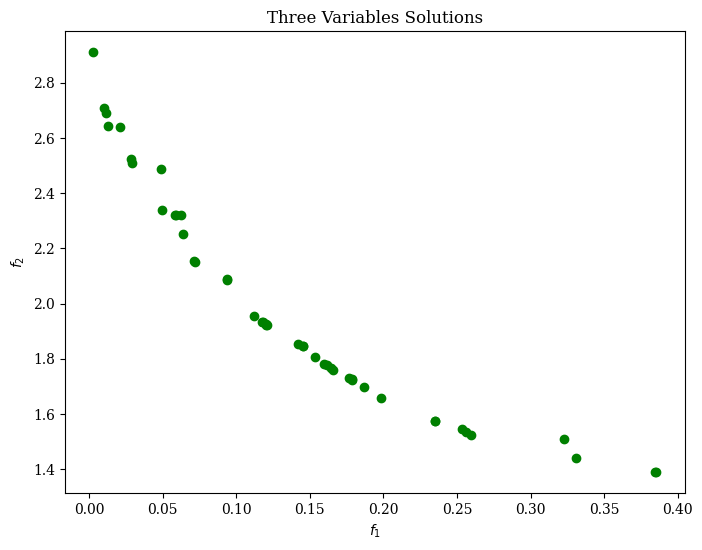

In [34]:
from pymoo.visualization.scatter import Scatter

plot = Scatter(title = "Three Variables Solutions")
plot.add(F, color = "green")
plot.show()

"""**Normalization**"""

ideal_point = F.min(axis=0)
nadir_point = F.max(axis=0)

ideal_point

nadir_point

**Code snippet from Udemy:**

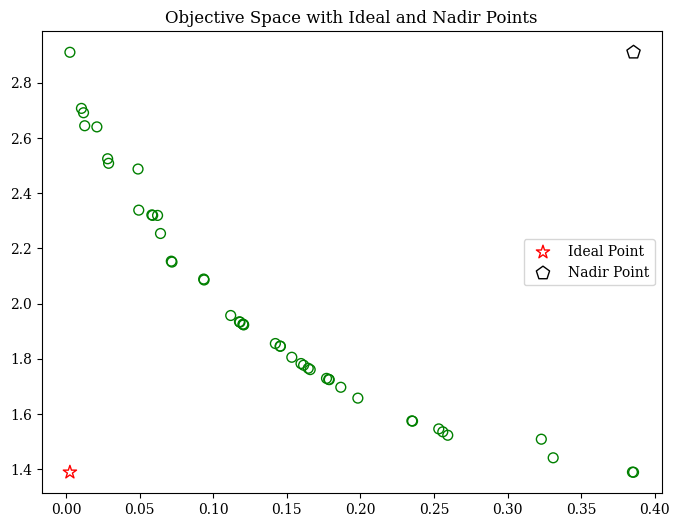

Scale f1: [0.0,1.0]
Scale f2: [0.0,1.0]


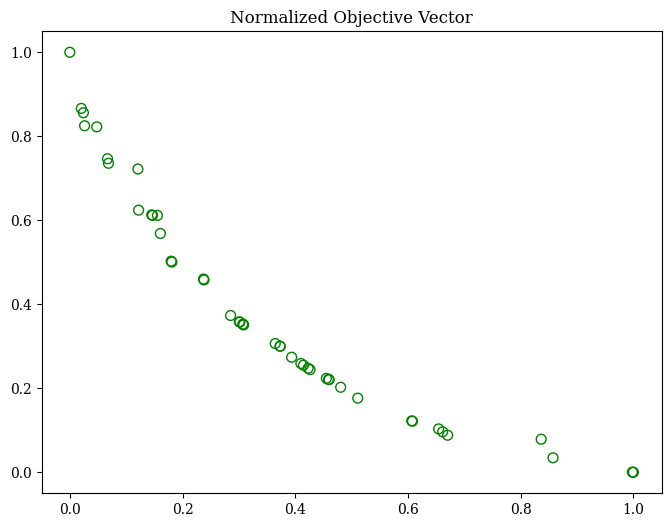

In [35]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(F[:,0],F[:,1],s=50,facecolor='none',edgecolors = 'green')
plt.scatter(ideal_point[0],ideal_point[1],facecolor='none',edgecolors = 'red',marker='*',s=100,label='Ideal Point')
plt.scatter(nadir_point[0],nadir_point[1],facecolor='none',edgecolors = 'black',marker='p',s=100,label='Nadir Point')
plt.title('Objective Space with Ideal and Nadir Points')
plt.legend()
plt.show()

nF = (F-ideal_point) / (nadir_point - ideal_point)

fl = nF.min(axis=0)
fu = nF.max(axis=0)

print(f"Scale f1: [{fl[0]},{fu[0]}]")
print(f"Scale f2: [{fl[1]},{fu[1]}]")

plt.figure(figsize=(8,6))
plt.scatter(nF[:,0],nF[:,1],s=50,facecolor='none',edgecolors = 'green')
plt.title('Normalized Objective Vector')
plt.show()